In [2]:
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mse_function(answer, prediction):
    mse = ((answer - prediction)**2).mean(axis=0)
    for i in range(len(answer.shape)-1):
        mse = mse.mean(axis=0)
    return mse

Data to test on

In [ ]:
# n = 10000
# time_span = 5
# c = 100
# time_step = 0.1
# integration_time_step = 0.01
# number_timesteps_predict = 2
# std = 0

# Load the observations
# name = f"{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.','')}"
# dictionary = np.load(f"data_dictionaries/data_{name}.npy", allow_pickle=True).item()
# observations = dictionary["observations"]
# c = 25
# predictions = dictionary[c]
# print(dictionary)

# # Calculate the mean squared error between the true observation and the imperfect model's prediction
# finalmse = mse_function(observations_scaled[:,-1,:], predictions_scaled[:,-1,:])
# print(finalmse)

In [10]:
# Variables relating to the data you want to load
system = 'Rossler'
x_transformation_type = 0
n = 10000
time_span = 5
time_step = 0.1
integration_time_step = 0.01
number_timesteps_predict = 5
std = 0.01

In [12]:
# name = f"{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
# MLonly_model = keras.models.load_model(f'saved_models/timesteps_{number_timesteps_predict}/MLonly_{name}.keras')

save_name = f"{system}{x_transformation_type}_{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
save_filepath = f'saved_models/{system}{x_transformation_type}/timesteps_{number_timesteps_predict}/MLonly_{save_name}.keras'
MLonly_model = keras.models.load_model(save_filepath)

In [20]:
c_array = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140 ,150, 175, 200, 225, 250, 300, 400, 500, 600, 700, 800, 900, 1000, np.inf]

name = f"{system}_{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
data_dictionary = np.load(f"data_dictionaries/data_{name}.npy", allow_pickle=True).item()
test_observations = data_dictionary["observations"]

# Load the mse dictionary
mse_dictionary_savename = f"{system}{x_transformation_type}_{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
mse_dictionary_filename = f'saved_models/{system}{x_transformation_type}/timesteps_{number_timesteps_predict}/mse_dictionary_{mse_dictionary_savename}.npy'

mse_dictionary = np.load(mse_dictionary_filename , allow_pickle = True).item()
# mse_dictionary = {}
# mse_dictionary['mse_imperfect_predictions'] = {}
# mse_dictionary['physical_loss'] = {}
# mse_dictionary['physical_error_loss'] = {}

for i, c in enumerate(c_array):
    test_predictions = data_dictionary[f'x_transformation_{x_transformation_type}'][c]

    # Calculate the mean squared error between the true observation and the imperfect model's prediction
    finalmse = mse_function(test_observations[:,-1,:], test_predictions)
    print(f"mse of imperfect predictions = {finalmse}")
    mse_dictionary['mse_imperfect_predictions'][c] = finalmse

    # #### Plot!
    # print(f'c={c}')
    # for i in range(2):
    #     plt.plot(test_observations[i,-5:,1], test_observations[i,-5:,2])
    #     plt.scatter(test_predictions[i,1], test_predictions[i,2])
    #     plt.show()
    # #####

    if c != np.inf:
        test_X = {"input_ob": test_observations[:,:-number_timesteps_predict,:], "input_pred": test_predictions}

        print(str(c).replace('.', ''))

        # Physical ML model
        save_name = f"{system}{x_transformation_type}_c{str(c).replace('.', '')}_{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
        save_filepath = f'saved_models/{system}{x_transformation_type}/timesteps_{number_timesteps_predict}/physical_{save_name}.keras'
        loaded_model = keras.models.load_model(save_filepath)
        loss_physical = loaded_model.evaluate(x = test_X, y = test_observations[:,-1,:])
        print(f"loss physical = {loss_physical}")
        mse_dictionary['physical_loss'][c] = loss_physical
    
        # save_filepath = f'saved_models/{system}{x_transformation_type}/timesteps_{number_timesteps_predict}/physical_error_{save_name}.keras'
        # loaded_model = keras.models.load_model(save_filepath)
        # loss_physical_error = loaded_model.evaluate(x = test_X, y = test_observations[:,-1,:] - test_predictions )
        # print(f"loss physical error = {loss_physical_error}")
        # mse_dictionary['physical_error_loss'][c] = loss_physical_error

MLonly_loss = MLonly_model.evaluate(x = test_observations[:,:-number_timesteps_predict,:], y = test_observations[:,-1,:])
print(f'ML only loss = {MLonly_loss}')
mse_dictionary['MLonly_loss'] = MLonly_loss
np.save(mse_dictionary_filename, mse_dictionary)

mse of imperfect predictions = 3.572441057686281e-07
313/313 [==============================] - 2s 6ms/step - loss: 6.3748e-07
ML only loss = 6.374789336405229e-07


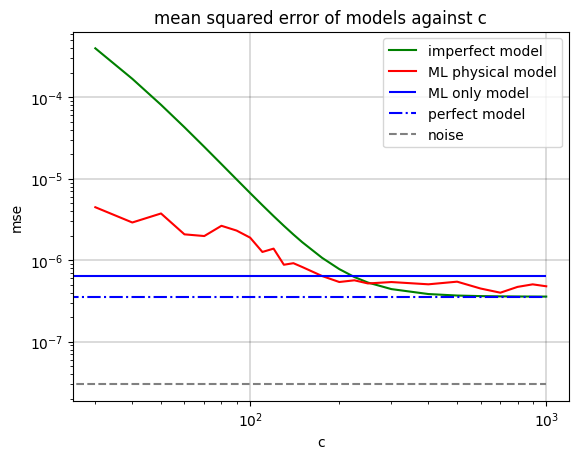

Text(0.5, 1.0, 'mse of ML models against mse of the imperfect physical model')

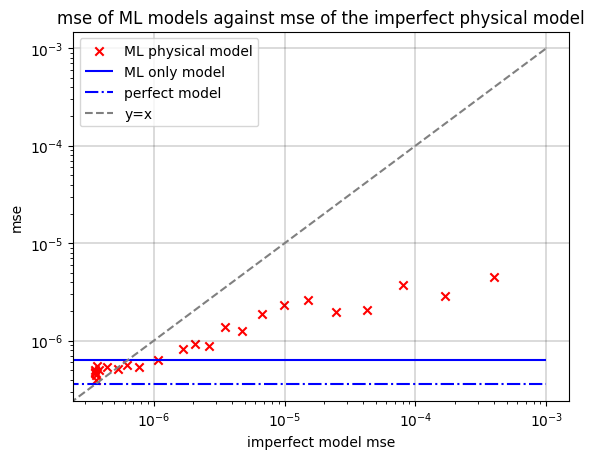

In [36]:
c_array = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140 ,150, 175, 200, 225, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

mse_dictionary_savename = f"{system}{x_transformation_type}_{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
mse_dictionary_filename = f'saved_models/{system}{x_transformation_type}/timesteps_{number_timesteps_predict}/mse_dictionary_{mse_dictionary_savename}.npy'
mse_dictionary = np.load(mse_dictionary_filename , allow_pickle = True).item()

finalmse = np.zeros(len(c_array))
loss_physical = np.zeros(len(c_array))
loss_physical_error = np.zeros(len(c_array))
MLonly_loss = mse_dictionary['MLonly_loss']
mse_perfect_model_prediction = mse_dictionary['mse_imperfect_predictions'][np.inf]

for i, c in enumerate(c_array):
    finalmse[i] = mse_dictionary['mse_imperfect_predictions'][c]
    loss_physical[i] = mse_dictionary['physical_loss'][c]
    # loss_physical_error[i] = mse_dictionary['physical_error_loss'][c]

plt.plot(c_array,finalmse,'-', label = 'imperfect model', color = 'g', )
plt.plot(c_array, loss_physical, '-', label = 'ML physical model', color = 'r')
# plt.plot(c_array, loss_physical_error, '-', label = 'ML physical error model', color = 'purple')
plt.hlines(MLonly_loss, 0,1000, label = 'ML only model', color = 'b')
plt.hlines(mse_perfect_model_prediction, 0,1000, linestyle = '-.', label = 'perfect model', color = 'b')
plt.hlines(3*10**(-8), 0,1000, linestyle = '--', label = 'noise', color = 'grey')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('c')
plt.ylabel('mse')
plt.grid(which='major', color='black', linestyle='-', linewidth = 0.2)
# plt.grid(which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('mean squared error of models against c')
# plt.savefig(f'mse_vs_c_timesteps{number_timesteps_predict}_{name}')
plt.show()

plt.scatter(finalmse, loss_physical, marker = 'x', label = 'ML physical model', color = 'r')
# plt.scatter(finalmse, loss_physical_error, marker='+', label = 'ML physical error model', color = 'g')
plt.hlines(MLonly_loss, 0,10**(-3), label = 'ML only model', color = 'b')
plt.hlines(mse_perfect_model_prediction, 0,10**(-3), linestyle = '-.', label = 'perfect model', color = 'b')
# plt.hlines(3*10**(-8), 0,1, linestyle = '-.', label = 'perfect model', color = 'b')
plt.plot([0,10**(-3)], [0,10**(-3)], '--', label = 'y=x', color = 'grey')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('imperfect model mse')
plt.ylabel('mse')
plt.grid(which='major', color='black', linestyle='-', linewidth = 0.2)
# plt.grid(which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('mse of ML models against mse of the imperfect physical model')
# plt.savefig(f'mse_vs_mse_timesteps{number_timesteps_predict}_{name}')
